In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))


In [2]:
from sklearn import preprocessing
import pandas as pd
from scipy import stats
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from scipy.stats import chi2_contingency
from src.analysis.analysis import analyze_data_quality,  main_analysis
from src.tools.preprocess import preprocess_data
import joblib

In [3]:
data = pd.read_csv('../data/processed/data.csv')
data

,Unnamed: 0,FarmID,category,Crop,State,District,Sub-District,SDate,HDate,CropCoveredArea,...,Season,geometry,dataset,tif_path,ndvi,evi,ndwi,gndvi,savi,msavi
0,0,1326576,Healthy,Paddy,Telangana,Medak,Kulcharam,2023-11-25 0:00:00,2024-04-14 0:00:00,97,...,Rabi,POLYGON ((78.18079255482755 17.978971746424413...,train,downloads/20240412T050649_20240412T051727_T43Q...,0.100756,-0.793684,8.488031,0.127153,0.151125,4232.596191
1,1,1326577,Healthy,Paddy,Telangana,Medak,Kulcharam,2023-11-13 0:00:00,2024-04-26 0:00:00,82,...,Rabi,POLYGON ((78.17483419891283 17.981508840879556...,train,downloads/20240425T051649_20240425T052817_T43Q...,0.188090,0.564248,11.493762,0.187815,0.282110,3249.392822
2,2,1326578,Healthy,Paddy,Telangana,Medak,Kulcharam,2023-12-19 0:00:00,2024-04-28 0:00:00,92,...,Rabi,POLYGON ((78.16888476438905 17.976727511659835...,train,downloads/20240427T050651_20240427T051439_T43Q...,0.206596,-1.456745,10.166884,0.206553,0.309869,3741.956055
3,3,1331836,Diseased,Paddy,Telangana,Medak,Kulcharam,2023-02-11 0:00:00,2024-11-04 0:00:00,91,...,Rabi,POLYGON ((78.16821795882959 17.974690113471414...,train,downloads/20241103T050951_20241103T052004_T43Q...,0.206250,2.206184,10.446196,0.220995,0.309350,3673.396729
4,4,1326579,Diseased,Paddy,Telangana,Medak,Kulcharam,2023-12-12 0:00:00,2024-05-19 0:00:00,94,...,Rabi,POLYGON ((78.17244459940454 17.969620948965225...,train,downloads/20240517T050651_20240517T051655_T43Q...,0.179721,-0.743638,8.665929,0.160657,0.269563,4227.338379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10601,10601,551119,NaN,Maize,Telangana,Nirmal,Sarangapur,2023-10-12 0:00:00,2024-07-03 0:00:00,92,...,Rabi,"POLYGON ((78.25900010978795 19.22927351046702,...",test,downloads/20240701T050659_20240701T051520_T43Q...,0.238710,3.679797,5.589317,0.037121,0.358050,5999.669434
10602,10602,916476,NaN,Maize,Telangana,Nirmal,Sarangapur,2023-05-11 0:00:00,2024-04-03 0:00:00,79,...,Rabi,POLYGON ((78.25818808460964 19.202014687110104...,test,downloads/20240402T050649_20240402T051718_T43Q...,0.203927,8.221752,10.971906,0.233944,0.305864,3527.668213
10603,10603,121860,NaN,Maize,Telangana,Nirmal,Sarangapur,2023-11-14 0:00:00,2024-03-04 0:00:00,87,...,Rabi,"POLYGON ((78.2554603258883 19.19636630652319, ...",test,downloads/20240303T050719_20240303T051936_T43Q...,0.171067,0.772799,12.381079,0.197460,0.256577,3089.120361
10604,10604,270936,NaN,Maize,Telangana,Nirmal,Sarangapur,2023-02-12 0:00:00,2024-03-26 0:00:00,95,...,Rabi,POLYGON ((78.25742756428231 19.195573453548704...,test,downloads/20240323T050649_20240323T051727_T43Q...,0.247241,-0.057281,10.578072,0.261666,0.370831,3743.854980



Variables numériques significativement associées à la catégorie (p < 0.05):
- CropCoveredArea: p-value = 0.0000
- WaterCov: p-value = 0.0475
- ndvi: p-value = 0.0467
- gndvi: p-value = 0.0067
- SDate_month: p-value = 0.0036
- HDate_year: p-value = 0.0002

Variables catégorielles significativement associées à la catégorie (p < 0.05):
- Crop: p-value = 0.0002
- District: p-value = 0.0000
- IrriType: p-value = 0.0013
- IrriSource: p-value = 0.0013
- Season: p-value = 0.0010


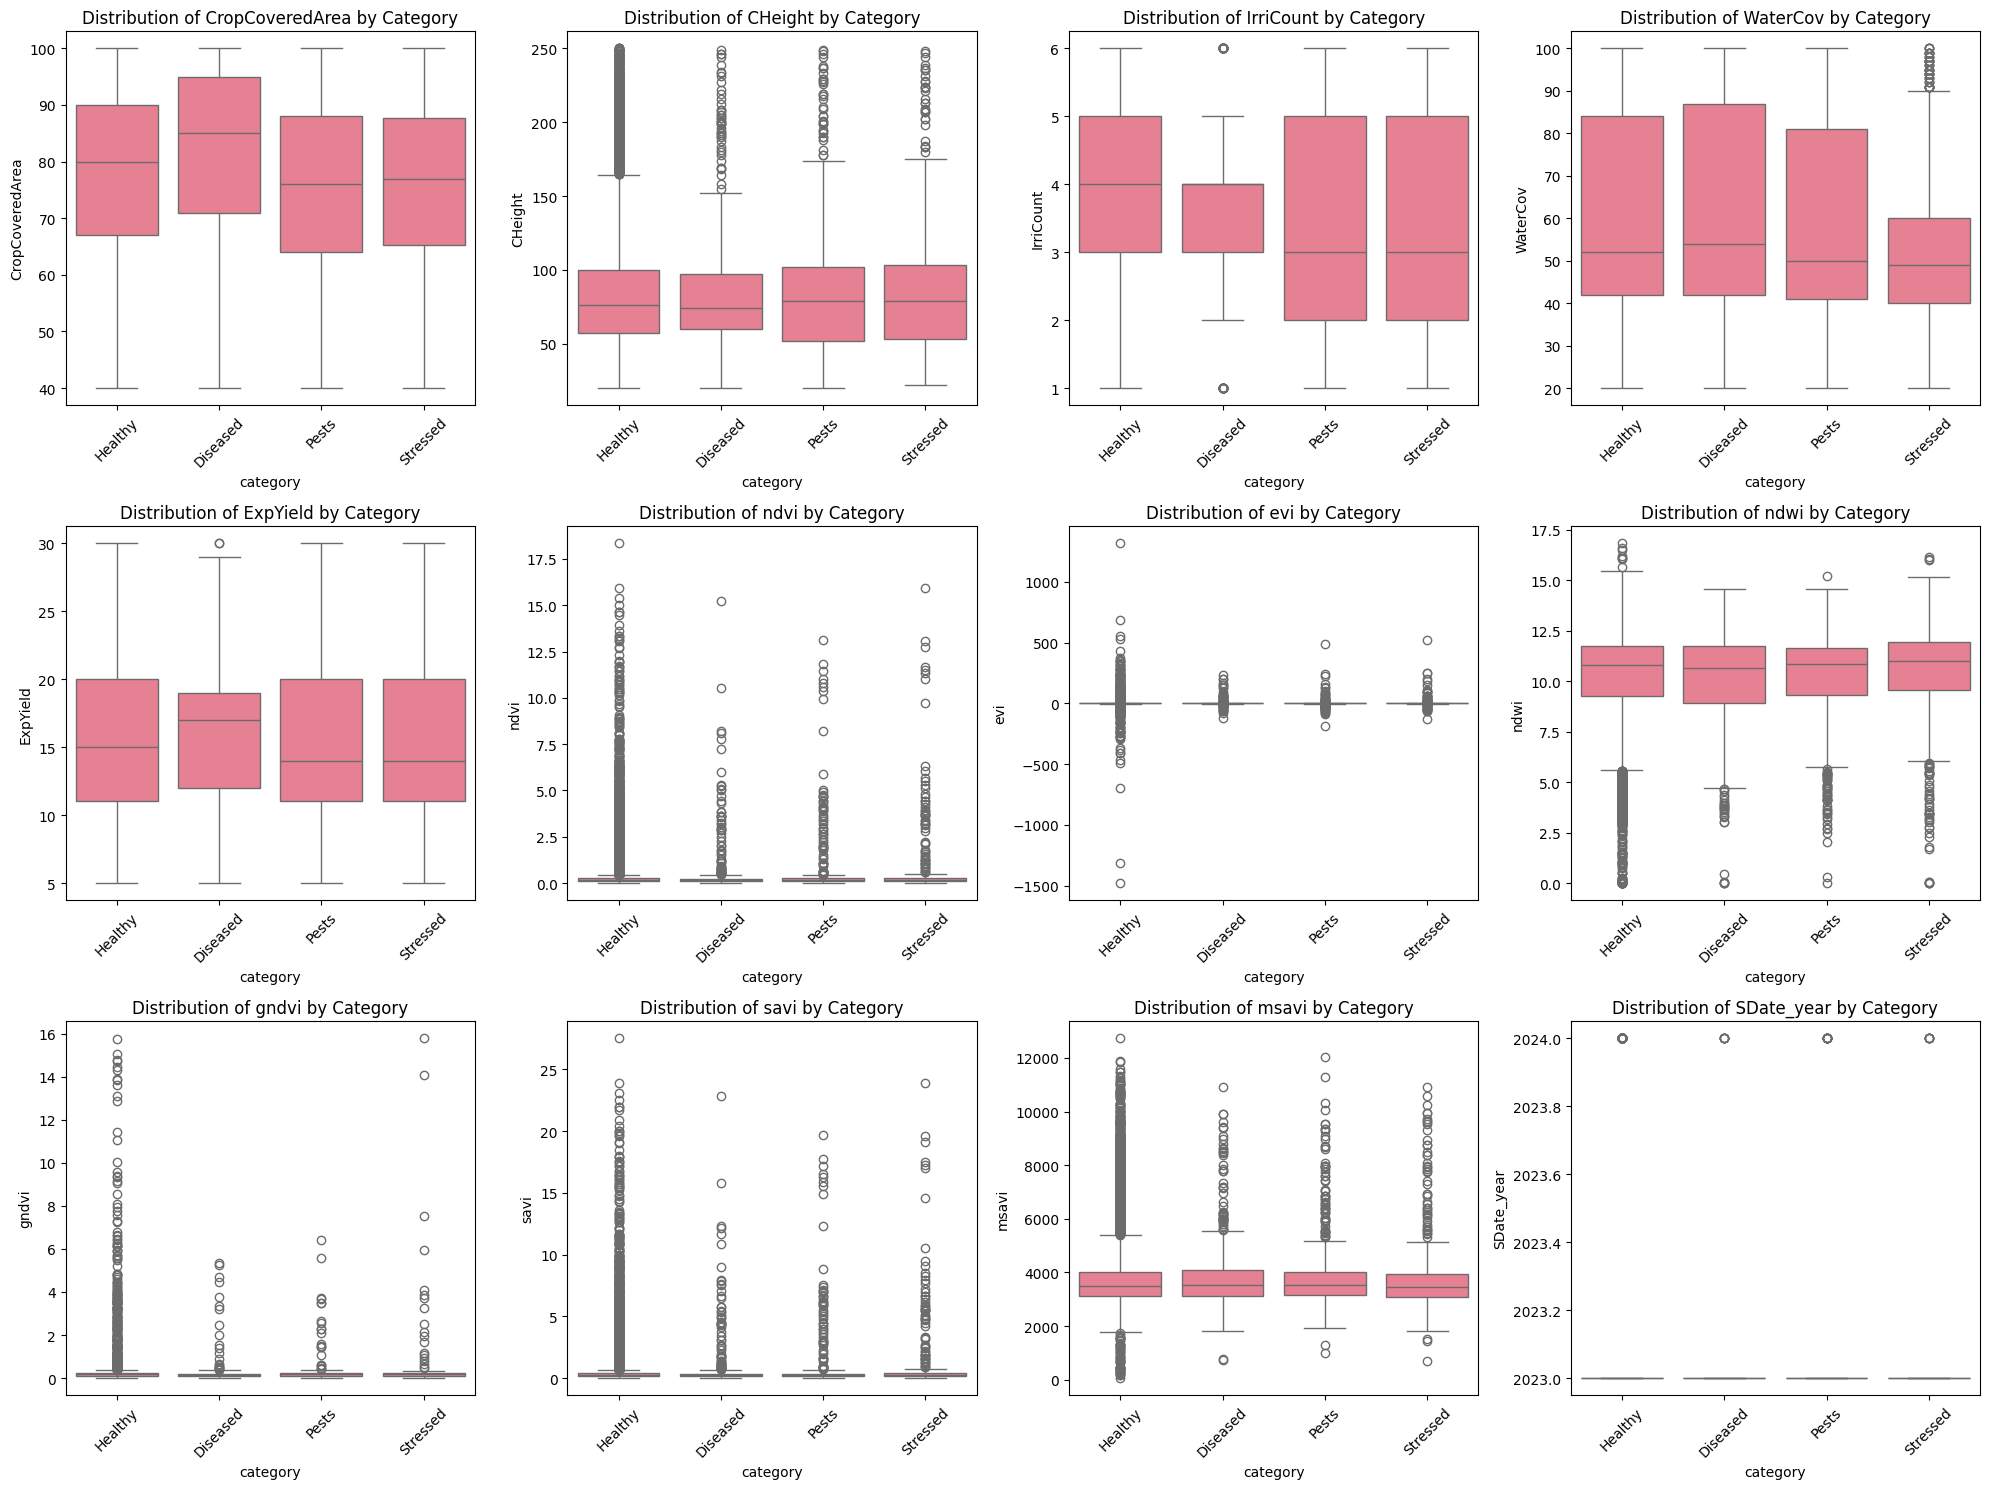

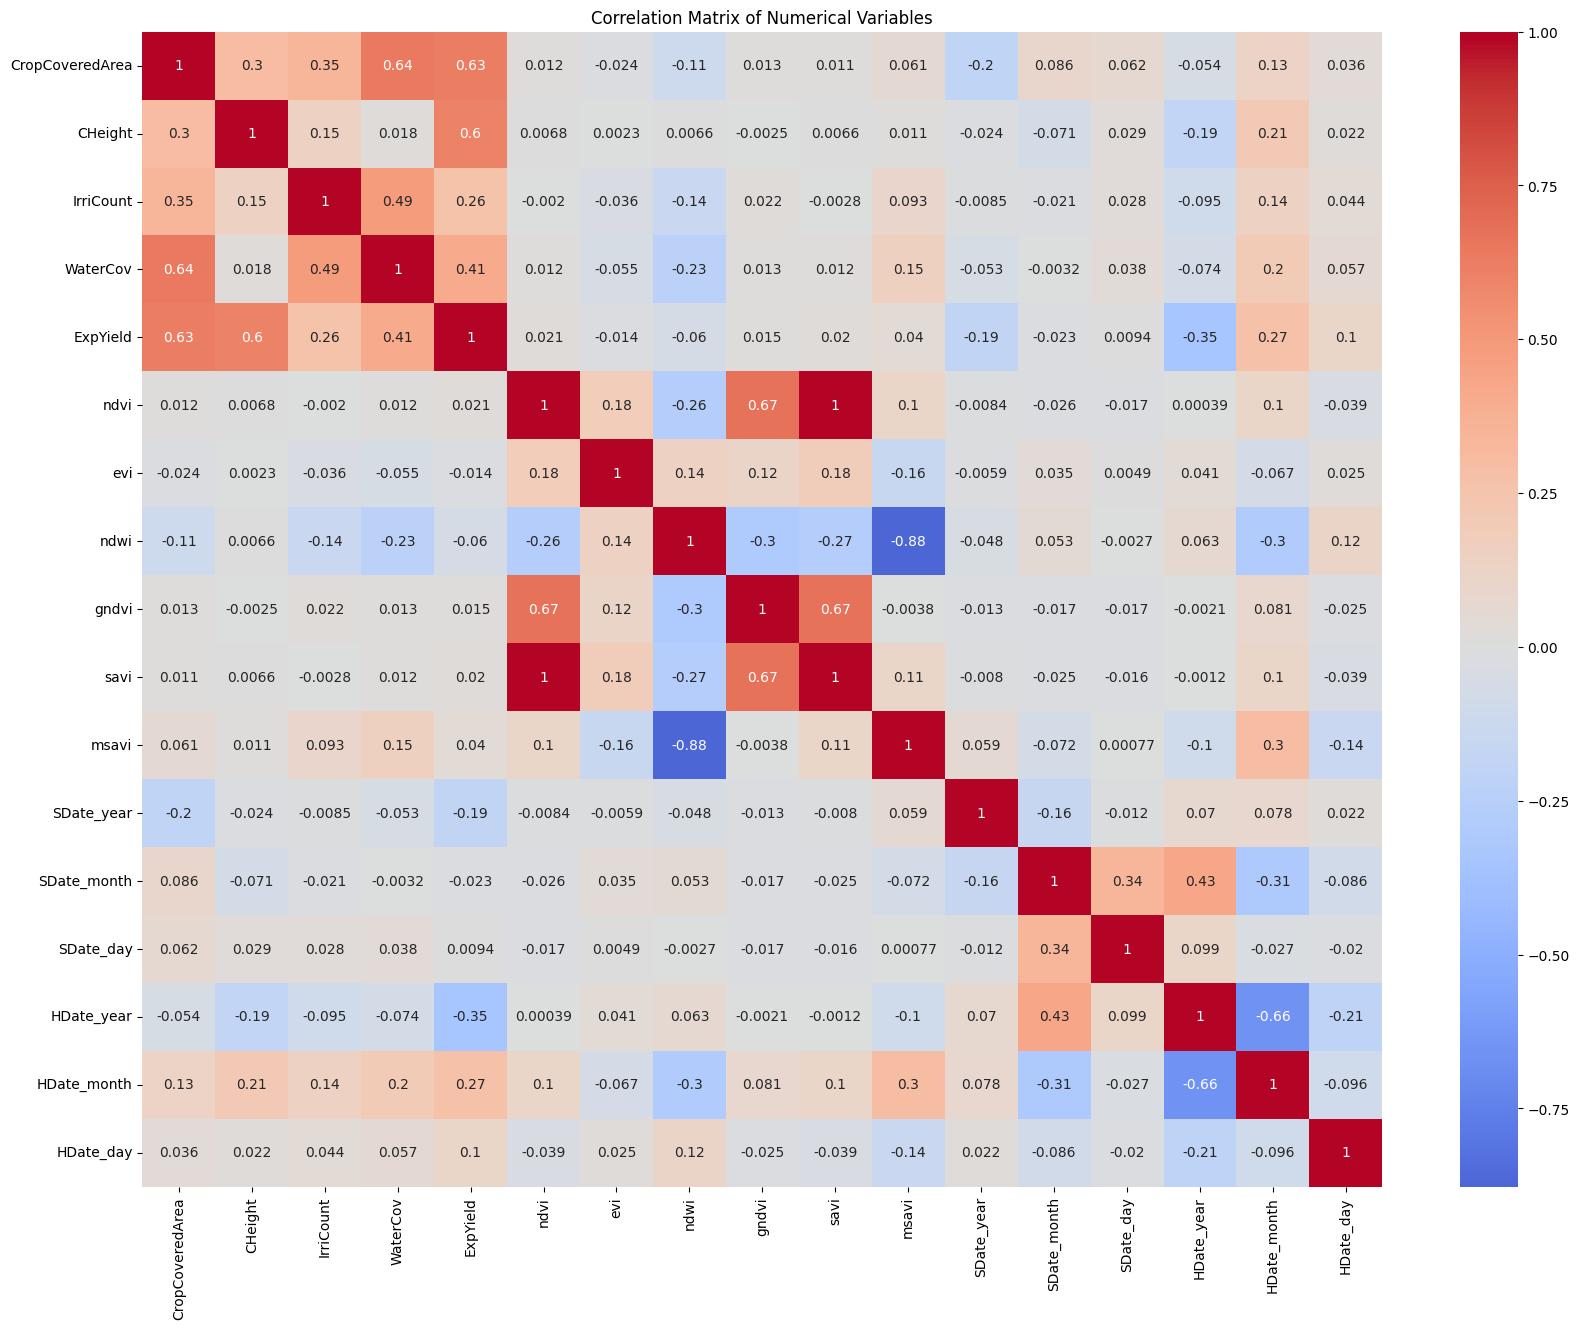

In [5]:
data_clean = preprocess_data(data[data["dataset"]=="train"])
analysis_resulults = main_analysis(data_clean)

In [19]:
feature_columns = [
    'CropCoveredArea', 'CHeight', 'IrriCount', 'WaterCov', 'ExpYield',
    'ndvi', 'evi', 'ndwi', 'gndvi', 'savi', 'msavi', 'SDate_year', 'SDate_month',
       'SDate_day', 'HDate_year', 'HDate_month', 'HDate_day'
]
X = data_clean[feature_columns]
y = data_clean['category']
enc = preprocessing.OneHotEncoder()
le = LabelEncoder()
y = le.fit_transform(y)
for i in range(4):
    print(f"classe {i} : {(y==i).sum()/y.sum():2.2%}")
le.classes_

classe 0 : 5.48%
classe 1 : 74.77%
classe 2 : 5.54%
classe 3 : 4.71%


array(['Diseased', 'Healthy', 'Pests', 'Stressed'], dtype=object)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
load_model = False
if load_model:
    best_lenear_model = joblib.load('best_svm_model.joblib')
else:
    param_grid = {
        'C': [0.1, 1, 10, 100],
        'kernel': ['rbf', 'linear', "sigmoid","poly"],
        'gamma': ['scale', 'auto', 0.1, 0.01]
    }
    svm = SVC(random_state=42)
    grid_search = GridSearchCV(
        svm, param_grid, cv=5, scoring='f1_macro', n_jobs=-1, verbose=1
    )
    grid_search.fit(X_train, y_train)
    best_lenear_model = grid_search.best_estimator_
    cv_scores = cross_val_score(
        best_lenear_model, X_train, y_train, cv=5, scoring='f1_macro'
    )
    
    cv_scores

Fitting 5 folds for each of 32 candidates, totalling 160 fits


KeyboardInterrupt: 

In [9]:


""" if best_lenear_model.kernel == 'linear':
    feature_importance = pd.DataFrame({
        'feature': feature_columns,
        'importance': np.abs(best_lenear_model.coef_[0])
    })
    feature_importance = feature_importance.sort_values(
        'importance', ascending=False)
else:
    feature_importance = None
results = {
    'best_params': grid_search.best_params_,
    'cv_scores': {
        'mean': cv_scores.mean(),
        'std': cv_scores.std(),
        'scores': cv_scores.tolist()
    },
    'test_performance': {
        'classification_report': classification_report(y_test, y_pred, output_dict=True),
        'confusion_matrix': confusion_matrix(y_test, y_pred).tolist()
    },
    'feature_importance': feature_importance.to_dict('records') if feature_importance is not None else None,
    'model': best_lenear_model,
    'scaler': scaler,
    'label_encoder': le
} """

y_pred = best_lenear_model.predict(X_test)

# Supposons que y_test et y_pred soient déjà définis comme des tableaux NumPy
for i in range(4):
    correct_predictions = np.sum((y_test == i) & (y_pred == i))
    
    total_samples = np.sum(y_test == i)
    
    # Éviter la division par zéro
    accuracy = correct_predictions / total_samples if total_samples > 0 else 0
    
    print(f'Précision pour la classe {i}: {accuracy:.2f}')

Précision pour la classe 0: 0.10
Précision pour la classe 1: 0.93
Précision pour la classe 2: 0.01
Précision pour la classe 3: 0.02


In [12]:
#save model
joblib.dump(best_lenear_model, 'best_svm_model.joblib')

['best_svm_model.joblib']

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


svm = SVC(class_weight='balanced', random_state=42)

param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['rbf', 'linear'],  # Gardez seulement le noyau RBF
    'gamma': ['scale', 'auto', 0.1, 0.01]
}

grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='f1_macro', n_jobs=-1, verbose=1)

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 32 candidates, totalling 160 fits
              precision    recall  f1-score   support

           0       0.09      0.23      0.13        81
           1       0.82      0.67      0.74      1134
           2       0.04      0.06      0.05        95
           3       0.03      0.05      0.04        65

    accuracy                           0.57      1375
   macro avg       0.25      0.25      0.24      1375
weighted avg       0.68      0.57      0.62      1375



In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
log_reg = LogisticRegression( solver='lbfgs', max_iter=200, class_weight='balanced')

param_grid = {
    'C': [0.1, 1, 10, 100], 
}
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='f1_macro', n_jobs=-1, verbose=1)

grid_search.fit(X_train, y_train)


best_model = grid_search.best_estimator_


y_pred = best_model.predict(X_test)

print("Matrice de confusion :\n", confusion_matrix(y_test, y_pred))
print("Rapport de classification :\n", classification_report(y_test, y_pred))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Matrice de confusion :
 [[ 36   8  22  15]
 [433 182 269 250]
 [ 24  15  31  25]
 [ 28   9  13  15]]
Rapport de classification :
               precision    recall  f1-score   support

           0       0.07      0.44      0.12        81
           1       0.85      0.16      0.27      1134
           2       0.09      0.33      0.14        95
           3       0.05      0.23      0.08        65

    accuracy                           0.19      1375
   macro avg       0.27      0.29      0.15      1375
weighted avg       0.71      0.19      0.24      1375

